# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [4]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



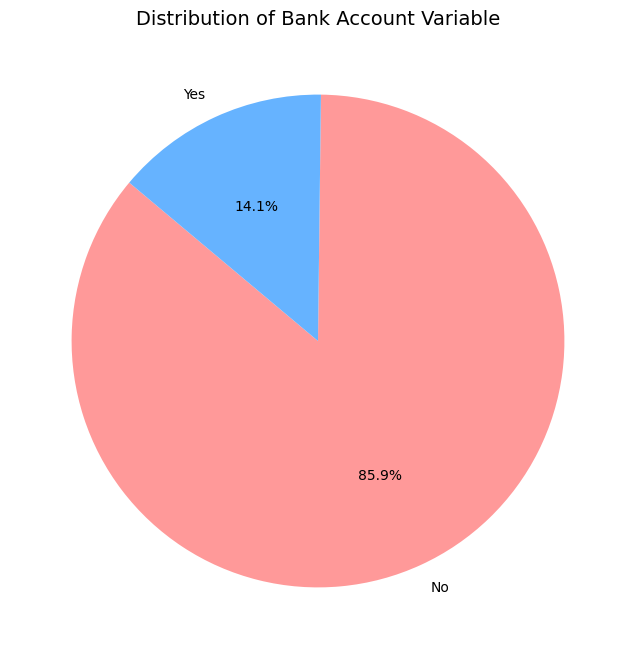

In [10]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = train['bank_account'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Bank Account Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


In [11]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

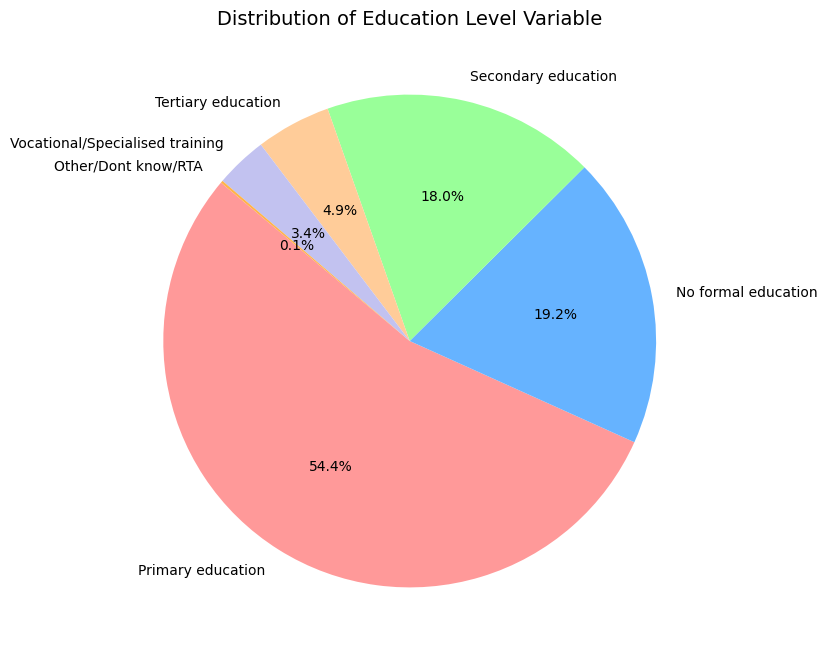

In [14]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = train['education_level'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Education Level Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


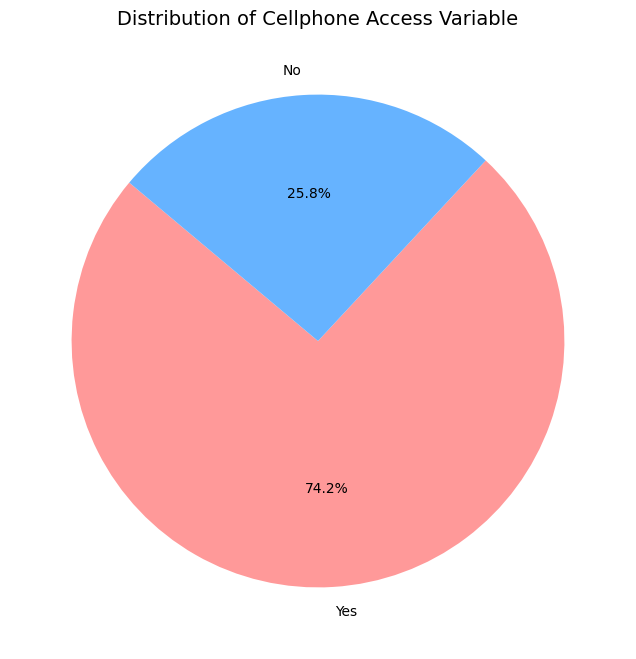

In [15]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = train['cellphone_access'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Cellphone Access Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


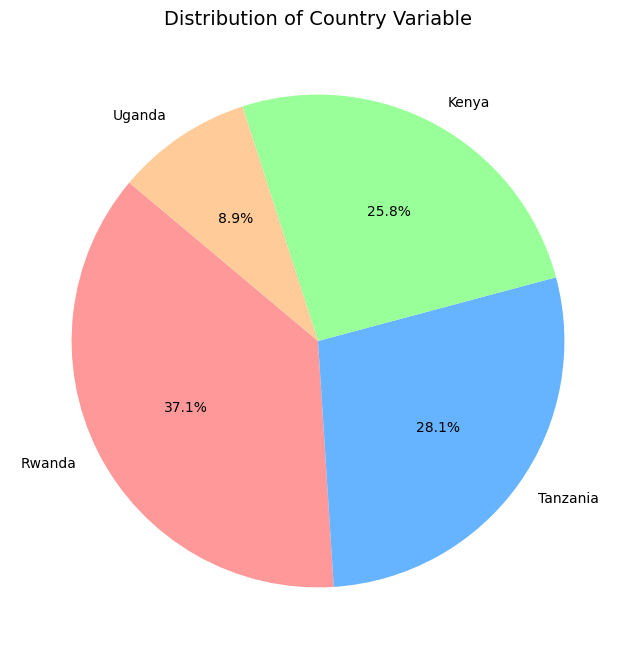

In [16]:
import matplotlib.pyplot as plt

# Custom color palette for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0','#FFB347', '#C4E17F', '#76D7EA', '#FFD1DC', '#D0BBFF', '#FEB2A8', '#FAF0CA', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#FFF0F5', '#D3D3D3']

# Calculate the distribution of the 'bank_account' variable as before
distribution = train['country'].value_counts(normalize=True)

# Generate a pie plot with the custom colors
plt.figure(figsize=(10, 8))  # Adjust the figure size to your preference
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Country Variable', fontsize=14)  # You can adjust the title and fontsize
plt.show()


In [ ]:
# Explore Target distribution 
sns.pie(x="bank_account", kind="count", data=train)

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [7]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [8]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...
